## **Houssam ELBERROUHI**

> #### **Spaceship Titanic**
> #### **Predict which passengers are transported to an alternate dimension**



**Dataset Description**

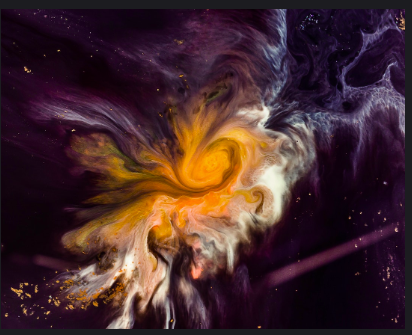  - *In this competition your task is to predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly. To help you make these predictions, you're given a set of personal records recovered from the ship's damaged computer system.*



**File and Data Field Descriptions**


- **train.csv** - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.
    - **``PassengerId``** - A unique Id for each passenger. Each Id takes the form ``gggg_pp`` where ``gggg`` indicates a group the passenger is travelling with and ``pp`` is their number within the group. People in a group are often family members, but not always.
    - **``HomePlanet``** - The planet the passenger departed from, typically their planet of permanent residence.
    - **``CryoSleep``** - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
    - **``Cabin``** - The cabin number where the passenger is staying. Takes the form ``deck/num/side``, where ``side`` can be either ``P`` for *Port* or ``S`` for *Starboard*.
    - **``Destination``** - The planet the passenger will be debarking to.
    - **``Age``** - The age of the passenger.
    - **``VIP``** - Whether the passenger has paid for special VIP service during the voyage.
    - **``RoomService``, ``FoodCourt``, ``ShoppingMall``, ``Spa``, ``VRDeck``** - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
    - **``Name``** - The first and last names of the passenger.
    - **``Transported``** - Whether the passenger was transported to another dimension. **This is the target**, the column you are trying to predict.

- **test.csv** - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of **``Transported``** for the passengers in this set.

- **sample_submission.csv** - A submission file in the correct format.
    - **``PassengerId``** - Id for each passenger in the test set.
    - **``Transported``** - The target. For each passenger, predict either True or False.

#### necessary imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score

### **Data Loading and Merging**

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df = pd.concat([df_train, df_test], sort = False) 
df.head() 

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
df.shape

(12970, 14)

In [5]:
df.value_counts('Transported') , df_train.value_counts('Transported') # Transported takes only train data values, since test has no Transported attribute

(Transported
 True     4378
 False    4315
 Name: count, dtype: int64,
 Transported
 True     4378
 False    4315
 Name: count, dtype: int64)

In [6]:
df['Transported'].isna().sum() , df_test.shape[0] # meaning that all Trasported values in test data are NaN

(4277, 4277)

- **assumbeling both train/test datasets , and filling Transported column in df_test with the appropriate frequency values**

In [7]:
# since test data has no "Transported" colmn, so we fill it 
# this ensures the test dataset's "Transported" column maintains the same True/False frequency distribution as the df_train
true_vals = df_train['Transported'].mean()
df_test['Transported'] = np.random.choice([True, False], size=len(df_test), p=[true_vals, 1-true_vals]) 

df = pd.concat([df_train, df_test], sort = False) 
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [8]:
df.value_counts('Transported')

Transported
False    6495
True     6475
Name: count, dtype: int64

In [9]:
df['Transported'].isna().sum()

0

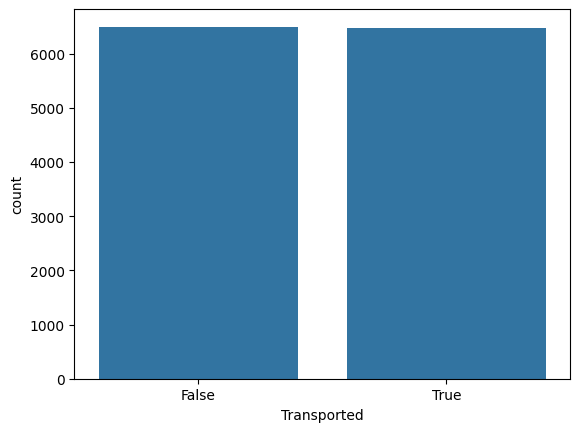

In [10]:
sns.countplot(x='Transported', data=df)
plt.show()

**personalizing data for more efficency**

- *separating the cabin column, to make it easier to read its data, and for more detailed dataset*

In [11]:
df.head(2)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True


In [12]:
df[['Deck', 'Num', 'Side']] = df['Cabin'].str.split('/', expand = True)
df = df.drop(columns = ['Cabin'])   # to make it easier for preprocessing & analyse

In [13]:
df.tail(2)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side
4275,9273_01,Europa,False,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,False,D,297,P
4276,9277_01,Earth,True,PSO J318.5-22,43.0,False,0.0,0.0,0.0,0.0,0.0,Lilace Leonzaley,True,G,1498,S


In [14]:
df['Num'].info() # numerical variable but trated as type-object 

<class 'pandas.core.series.Series'>
Index: 12970 entries, 0 to 4276
Series name: Num
Non-Null Count  Dtype 
--------------  ----- 
12671 non-null  object
dtypes: object(1)
memory usage: 202.7+ KB


In [15]:
# so we convert it to numerical values
df['Num'] = pd.to_numeric(df['Num'], errors='coerce')  # converts non-numerical values to NaN
df['Num'].dtype

dtype('float64')

- *removing unecessary column that have no inluence*

In [16]:
df.drop(['Name', 'PassengerId'], axis = 1, inplace = True) # removed since they have no influence

In [17]:
df.head(3)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0.0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0.0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0.0,S


- reordoring Transported column to the end of dataset

In [18]:
df = df.reindex(columns=[col for col in df.columns if col != 'Transported'] + ['Transported'])
df.head()   # just to send the Transported class to the end of columns

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Num,Side,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,B,0.0,P,False
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,F,0.0,S,True
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,A,0.0,S,False
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,A,0.0,S,False
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,F,1.0,S,True


In [19]:
df.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Deck', 'Num', 'Side',
       'Transported'],
      dtype='object')

### **Data Cleaning**

1. Which features are categorical and which are numerical?
2. Available Data Types?

### **Handling Missing Values**

**Which Features are Categorical and which are Numerical?**

In [20]:
print("Categorical Variables : \n")
categorical_variables = df.select_dtypes(include=['object']).columns
for col in categorical_variables:
    print(col)

Categorical Variables : 

HomePlanet
CryoSleep
Destination
VIP
Deck
Side


In [21]:
print("Numerical Variables : \n")
numerical_variables = df._get_numeric_data().columns
for col in numerical_variables:
    print(col)

Numerical Variables : 

Age
RoomService
FoodCourt
ShoppingMall
Spa
VRDeck
Num
Transported


-  **None, blank or empty values?**

In [22]:
df.isna().sum() # to knw how many NaN values in each attribut 

HomePlanet      288
CryoSleep       310
Destination     274
Age             270
VIP             296
RoomService     263
FoodCourt       289
ShoppingMall    306
Spa             284
VRDeck          268
Deck            299
Num             299
Side            299
Transported       0
dtype: int64

-  **handling NaN values:**

    - Categorical variables : 

        - Replace `None values` with the most common value in the column **(mode)**

    - Numerical Data:

        - replacing with **0** for `ShoppingMall`, `RoomService`, `FoodCourt`, `Spa`, and `VRDeck` aligns with the assumption that passengers didn't pay for that service.
        - replacing `Age` with the **median** 

In [23]:
numerical_features = ['ShoppingMall', 'RoomService', 'FoodCourt', 'Spa', 'VRDeck'] 

for feature in numerical_features:
    df[feature] = df[feature].fillna(df[feature].median())
            # I decided not to replace 0 values, since they have meaning : (0 means the passanger didn't pay money for that service)
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Num'] = df['Num'].fillna(df['Num'].median())    # The median is less sensitive to outliers 
                                                    # (Outliers are data points that significantly differ from the rest of the dataset)

In [24]:
categorical_features = ['CryoSleep', 'VIP', 'HomePlanet', 'Deck','Side','Destination']
for feature in categorical_features:
    df[feature] = df[feature].fillna(df[feature].mode()[0])   

C:\Users\USER\AppData\Local\Temp\ipykernel_10268\367376061.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[feature] = df[feature].fillna(df[feature].mode()[0])


In [25]:
df.isna().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Deck            0
Num             0
Side            0
Transported     0
dtype: int64

### **Normalization**

*ensure Numerical features have a similar scale,*

In [26]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Num
count,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000
mean,28.735081,218.378026,441.890979,170.779491,301.722282,300.450270,599.622899
std,14.238958,641.766201,1568.038076,584.153630,1118.746785,1168.655639,507.606477
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,175.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,431.000000
75%,37.000000,42.750000,62.750000,23.000000,50.000000,36.000000,992.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,1894.000000


we can see that the numerical values are not very close to each other, most of 'em goes betwenn : (29813.000000) and (0.0)
so we need to standardize these features so they have more impact when training our model

Standardization rescales data to have a mean (average) of 0 and a standard deviation of 1.

In [27]:
from sklearn.preprocessing import StandardScaler

numerical_features = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck' , 'Num']

scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Num
count,12970.000000,1.297000e+04,1.297000e+04,1.297000e+04,1.297000e+04,1.297000e+04,1.297000e+04
mean,28.735081,5.204438e-18,-2.300909e-17,-2.081775e-17,5.478356e-19,2.369389e-17,-7.012295e-17
std,14.238958,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00
min,0.000000,-3.402897e-01,-2.818222e-01,-2.923650e-01,-2.697071e-01,-2.571004e-01,-1.181321e+00
25%,20.000000,-3.402897e-01,-2.818222e-01,-2.923650e-01,-2.697071e-01,-2.571004e-01,-8.365521e-01
50%,27.000000,-3.402897e-01,-2.818222e-01,-2.923650e-01,-2.697071e-01,-2.571004e-01,-3.322050e-01
75%,37.000000,-2.736741e-01,-2.418025e-01,-2.529903e-01,-2.250125e-01,-2.262946e-01,7.730245e-01
max,79.000000,2.198490e+01,1.873184e+01,3.992463e+01,1.976062e+01,2.039392e+01,2.550060e+00


In [28]:
df.describe(include=['O']) # categorical data

,HomePlanet,Destination,Deck,Side
count,12970,12970,12970,12970
unique,3,3,8,2
top,Earth,TRAPPIST-1e,F,S
freq,7153,9145,4538,6680


- **count of how many variables are in each attribute of each column**

In [29]:
# count of how many variables are in each attribute of each column
for i in df.columns:
    j = df[i].value_counts()
    d = pd.DataFrame(j)    
    print(d , '\n')

            count
HomePlanet       
Earth        7153
Europa       3133
Mars         2684 

           count
CryoSleep       
False       8389
True        4581 

               count
Destination         
TRAPPIST-1e     9145
55 Cancri e     2641
PSO J318.5-22   1184 

      count
Age        
27.0    656
18.0    496
24.0    482
21.0    468
19.0    455
...     ...
75.0      6
79.0      5
78.0      4
77.0      3
76.0      2

[80 rows x 1 columns] 

       count
VIP         
False  12697
True     273 

             count
RoomService       
-0.340290     8566
-0.338731      185
-0.337173      113
-0.335615       89
-0.334057       71
...            ...
 0.069533        1
 0.081999        1
 1.096426        1
 5.744715        1
 0.675696        1

[1578 rows x 1 columns] 

           count
FoodCourt       
-0.281822   8435
-0.281184    175
-0.280547    105
-0.279271     75
-0.279909     74
...          ...
 1.537719      1
 5.773749      1
-0.063707      1
 7.085630      1
 0.101474      1



**voila notre dataset final apres la normalisation,le replissage des valeur NaN, le traitement des valeur manquant, et la cancatenation des deux datasets (train.csv/test.csv)**

In [30]:
df

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Num,Side,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,-0.340290,-0.281822,-0.292365,-0.269707,-0.257100,B,-1.181321,P,False
1,Earth,False,TRAPPIST-1e,24.0,False,-0.170439,-0.276082,-0.249566,0.221040,-0.219449,F,-1.181321,S,True
2,Europa,False,TRAPPIST-1e,58.0,True,-0.273285,1.998823,-0.292365,5.732776,-0.215170,A,-1.181321,S,False
3,Europa,False,TRAPPIST-1e,33.0,False,-0.340290,0.536429,0.342766,2.706059,-0.091947,A,-1.181321,S,False
4,Earth,False,TRAPPIST-1e,16.0,False,0.131863,-0.237179,-0.033861,0.235342,-0.255389,F,-1.179351,S,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,Earth,True,TRAPPIST-1e,34.0,False,-0.340290,-0.281822,-0.292365,-0.269707,-0.257100,G,1.765958,S,True
4273,Earth,False,TRAPPIST-1e,42.0,False,-0.340290,0.258364,-0.263262,-0.260768,-0.133877,F,-0.332205,S,True
4274,Mars,True,55 Cancri e,27.0,False,-0.340290,-0.281822,-0.292365,-0.269707,-0.257100,D,-0.598169,P,False
4275,Europa,False,TRAPPIST-1e,27.0,False,-0.340290,1.427386,-0.292365,-0.269707,0.190440,D,-0.596199,P,False


### **Visualization**

**categorical_variables :**

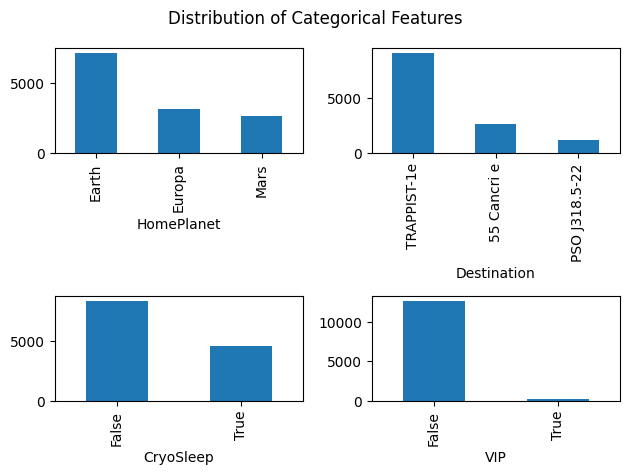

In [31]:
plt.suptitle('Distribution of Categorical Features')
plt.subplot(2,2,1)
df['HomePlanet'].value_counts().plot.bar()
plt.subplot(2,2,2)
df['Destination'].value_counts().plot.bar()
plt.subplot(2,2,3)
df['CryoSleep'].value_counts().plot.bar()
plt.subplot(2,2,4)
df['VIP'].value_counts().plot.bar()
plt.tight_layout()

**numerical_variables :**

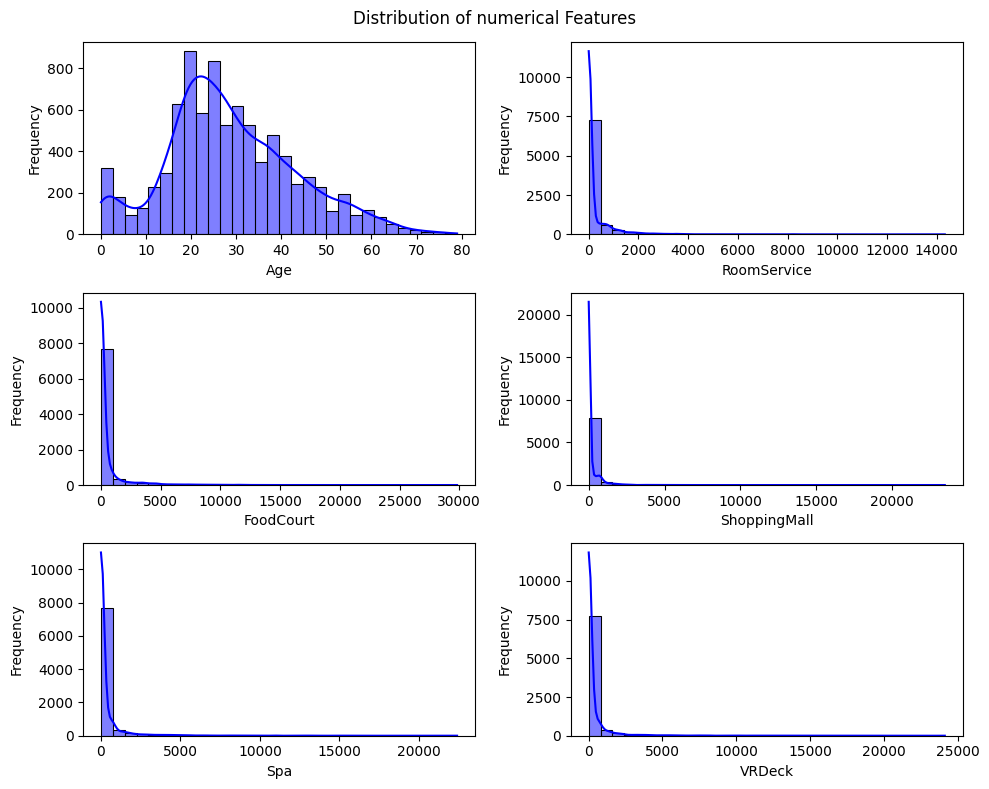

In [32]:
numerical_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 8))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    plt.suptitle('Distribution of numerical Features')
    sns.histplot(df_train[feature], kde=True, bins=30, color='blue', ax=axes[i])
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()  # power low (RoomService)

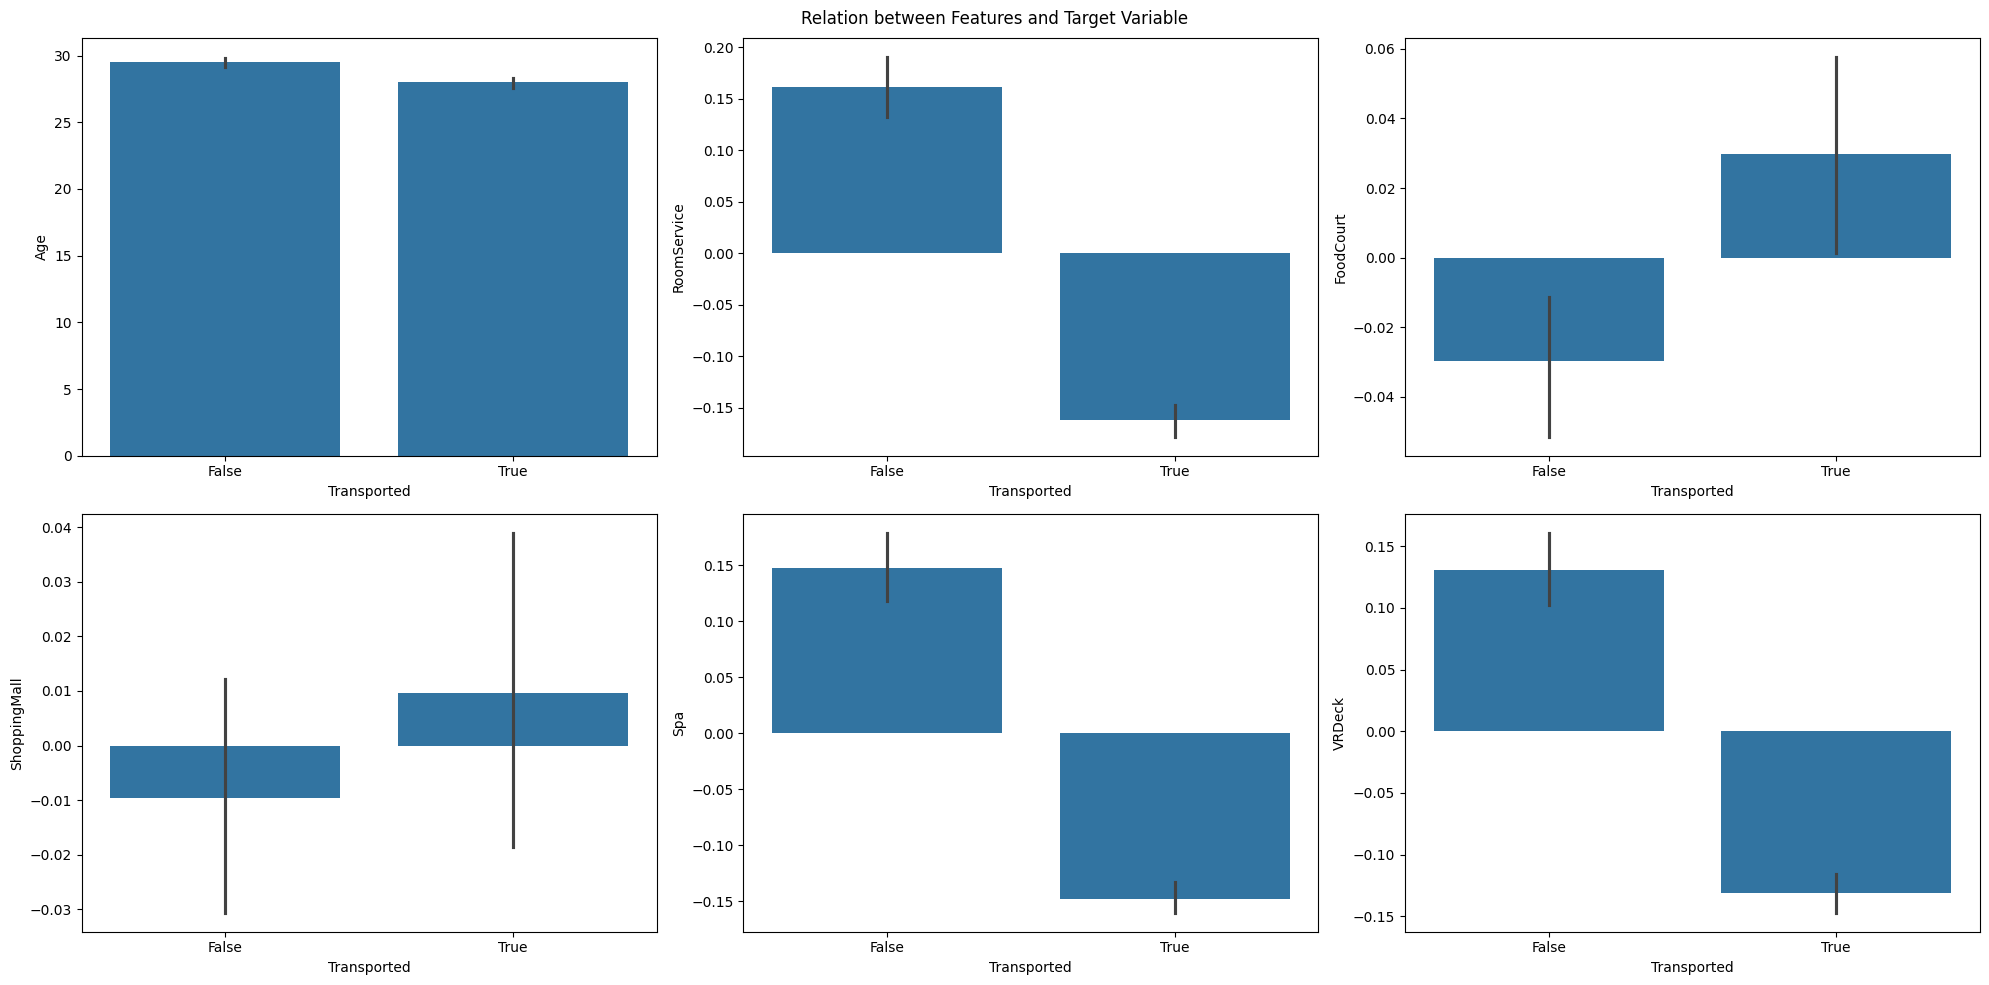

In [33]:
plt.figure(figsize=(20, 10))
plt.suptitle('Relation between Features and Target Variable')
plt.subplot(2,3,1)
sns.barplot(x='Transported', y='Age', data=df)
plt.subplot(2,3,2)
sns.barplot(x='Transported', y='RoomService', data=df)
plt.subplot(2,3,3)
sns.barplot(x='Transported', y='FoodCourt', data=df)
plt.subplot(2,3,4)
sns.barplot(x='Transported', y='ShoppingMall', data=df)
plt.subplot(2,3,5)
sns.barplot(x='Transported', y='Spa', data=df)
plt.subplot(2,3,6)
sns.barplot(x='Transported', y='VRDeck', data=df)
plt.tight_layout()
plt.show()


- **Age**          : the older the passenger 📈, not to be transported ❌  
- **RoomService**  : the more the passenger paid for RoomService 📈, not to be transported ❌
- **FoodCourt**    : the more the passenger paid for FoodCourt 📈, are to be transported  ✅
- **ShoppingMall** : the more the passenger paid for ShoppingMall 📈, are to be transported  ✅
- **Spa**          : the more the passenger paid for Spa 📈, not to be transported ❌
- **VRDeck**       : the more the passenger paid for VRDeck 📈, not to be transported ❌



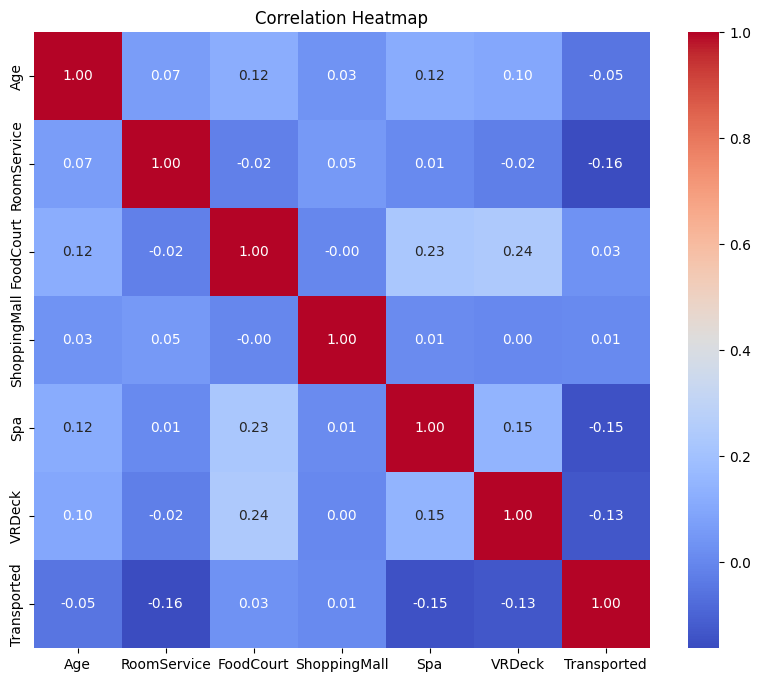

In [34]:
correlation_matrix = df[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True,
    square=True
)
plt.title("Correlation Heatmap")
plt.show()

In [35]:
correlation_matrix['Transported'].sort_values(ascending=False)

# this means that the higher the value of the feature, the more likely the passenger is to be transported 

Transported     1.000000
FoodCourt       0.029800
ShoppingMall    0.009597
Age            -0.052825
VRDeck         -0.131112
Spa            -0.147733
RoomService    -0.161929
Name: Transported, dtype: float64

### **Feature Engineering**

*TotalSpending as the sum of spending-related features*

In [36]:
df['TotalSpending'] = df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)

df = df.reindex(columns=[col for col in df.columns if col != 'Transported'] + ['Transported'])
df.head()   # just re-ordering the Transported class to the end of columns

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Num,Side,TotalSpending,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,-0.340290,-0.281822,-0.292365,-0.269707,-0.257100,B,-1.181321,P,-1.441284,False
1,Earth,False,TRAPPIST-1e,24.0,False,-0.170439,-0.276082,-0.249566,0.221040,-0.219449,F,-1.181321,S,-0.694498,True
2,Europa,False,TRAPPIST-1e,58.0,True,-0.273285,1.998823,-0.292365,5.732776,-0.215170,A,-1.181321,S,6.950779,False
3,Europa,False,TRAPPIST-1e,33.0,False,-0.340290,0.536429,0.342766,2.706059,-0.091947,A,-1.181321,S,3.153018,False
4,Earth,False,TRAPPIST-1e,16.0,False,0.131863,-0.237179,-0.033861,0.235342,-0.255389,F,-1.179351,S,-0.159224,True


In [37]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder() 

for column in ['HomePlanet', 'Destination', 'CryoSleep', 'VIP', 'Deck', 'Side']: 
    df[column] = label_encoder.fit_transform(df[column].astype(str)) 


In [38]:
df[['HomePlanet']].value_counts()  , df[['Destination']].value_counts() , df[['CryoSleep']].value_counts() , df[['VIP']].value_counts() ,  df[['Side']].value_counts() , df[['Deck']].value_counts()

# homeplanet => 0 : Earth, 1 : Europa, 2 : Mars 
# CryoSleep => 0 : No, 1 : Yes
# VIP => 0 : No, 1 : Yes
# Deck => 0 : A, 1 : B, 2 : C, 3 : D, 4 : E, 5 : F, 6 : G, 7 : H
# Side => 0 : L, 1 : R


(HomePlanet
 0             7153
 1             3133
 2             2684
 Name: count, dtype: int64,
 Destination
 2              9145
 0              2641
 1              1184
 Name: count, dtype: int64,
 CryoSleep
 0            8389
 1            4581
 Name: count, dtype: int64,
 VIP
 0      12697
 1        273
 Name: count, dtype: int64,
 Side
 1       6680
 0       6290
 Name: count, dtype: int64,
 Deck
 5       4538
 6       3781
 4       1323
 1       1141
 2       1102
 3        720
 0        354
 7         11
 Name: count, dtype: int64)

In [39]:
df

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Num,Side,TotalSpending,Transported
0,1,0,2,39.0,0,-0.340290,-0.281822,-0.292365,-0.269707,-0.257100,1,-1.181321,0,-1.441284,False
1,0,0,2,24.0,0,-0.170439,-0.276082,-0.249566,0.221040,-0.219449,5,-1.181321,1,-0.694498,True
2,1,0,2,58.0,1,-0.273285,1.998823,-0.292365,5.732776,-0.215170,0,-1.181321,1,6.950779,False
3,1,0,2,33.0,0,-0.340290,0.536429,0.342766,2.706059,-0.091947,0,-1.181321,1,3.153018,False
4,0,0,2,16.0,0,0.131863,-0.237179,-0.033861,0.235342,-0.255389,5,-1.179351,1,-0.159224,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,0,1,2,34.0,0,-0.340290,-0.281822,-0.292365,-0.269707,-0.257100,6,1.765958,1,-1.441284,True
4273,0,0,2,42.0,0,-0.340290,0.258364,-0.263262,-0.260768,-0.133877,5,-0.332205,1,-0.739833,True
4274,2,1,0,27.0,0,-0.340290,-0.281822,-0.292365,-0.269707,-0.257100,3,-0.598169,0,-1.441284,False
4275,1,0,2,27.0,0,-0.340290,1.427386,-0.292365,-0.269707,0.190440,3,-0.596199,0,0.715464,False


### **saving changes to a new csv file**

In [40]:
df.to_csv('cleaned_spaceship_titanic_data.csv', index=False)

### **Modelling**

**importing necessary libs**

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier


**Loading the clean data**

In [42]:
path = "cleaned_spaceship_titanic_data.csv"
df = pd.read_csv(path)
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Num,Side,TotalSpending,Transported
0,1,0,2,39.0,0,-0.340290,-0.281822,-0.292365,-0.269707,-0.257100,1,-1.181321,0,-1.441284,False
1,0,0,2,24.0,0,-0.170439,-0.276082,-0.249566,0.221040,-0.219449,5,-1.181321,1,-0.694498,True
2,1,0,2,58.0,1,-0.273285,1.998823,-0.292365,5.732776,-0.215170,0,-1.181321,1,6.950779,False
3,1,0,2,33.0,0,-0.340290,0.536429,0.342766,2.706059,-0.091947,0,-1.181321,1,3.153018,False
4,0,0,2,16.0,0,0.131863,-0.237179,-0.033861,0.235342,-0.255389,5,-1.179351,1,-0.159224,True


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   HomePlanet     12970 non-null  int64  
 1   CryoSleep      12970 non-null  int64  
 2   Destination    12970 non-null  int64  
 3   Age            12970 non-null  float64
 4   VIP            12970 non-null  int64  
 5   RoomService    12970 non-null  float64
 6   FoodCourt      12970 non-null  float64
 7   ShoppingMall   12970 non-null  float64
 8   Spa            12970 non-null  float64
 9   VRDeck         12970 non-null  float64
 10  Deck           12970 non-null  int64  
 11  Num            12970 non-null  float64
 12  Side           12970 non-null  int64  
 13  TotalSpending  12970 non-null  float64
 14  Transported    12970 non-null  bool   
dtypes: bool(1), float64(8), int64(6)
memory usage: 1.4 MB


In [44]:
df.describe()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Num,Side,TotalSpending
count,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,1.297000e+04,1.297000e+04,1.297000e+04,1.297000e+04,1.297000e+04,12970.000000,1.297000e+04,12970.000000,1.297000e+04
mean,0.655436,0.353200,1.501465,28.735081,0.021049,8.491451e-18,-1.753074e-17,3.944416e-17,6.026191e-18,6.080975e-17,4.336931,-7.888832e-17,0.515035,1.095671e-17
std,0.799855,0.477983,0.810738,14.238958,0.143552,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.741875,1.000039e+00,0.499793,2.508513e+00
min,0.000000,0.000000,0.000000,0.000000,0.000000,-3.402897e-01,-2.818222e-01,-2.923650e-01,-2.697071e-01,-2.571004e-01,0.000000,-1.181321e+00,0.000000,-1.441284e+00
25%,0.000000,0.000000,1.000000,20.000000,0.000000,-3.402897e-01,-2.818222e-01,-2.923650e-01,-2.697071e-01,-2.571004e-01,3.000000,-8.365521e-01,0.000000,-1.441284e+00
50%,0.000000,0.000000,2.000000,27.000000,0.000000,-3.402897e-01,-2.818222e-01,-2.923650e-01,-2.697071e-01,-2.571004e-01,5.000000,-3.322050e-01,1.000000,-7.767784e-01
75%,1.000000,1.000000,2.000000,37.000000,0.000000,-2.736741e-01,-2.418025e-01,-2.529903e-01,-2.250125e-01,-2.262946e-01,6.000000,7.730245e-01,1.000000,3.385707e-01
max,2.000000,1.000000,2.000000,79.000000,1.000000,2.198490e+01,1.873184e+01,3.992463e+01,1.976062e+01,2.039392e+01,7.000000,2.550060e+00,1.000000,3.932993e+01


**spliting data into train and test**

In [45]:
# Define features and target
X = df.drop(columns=['Transported']) 
y = df[['Transported']].astype(int)    # Convert target to integer for compatibility


In [46]:
y , X

(       Transported
 0                0
 1                1
 2                0
 3                0
 4                1
 ...            ...
 12965            1
 12966            1
 12967            0
 12968            0
 12969            1
 
 [12970 rows x 1 columns],
        HomePlanet  CryoSleep  Destination   Age  VIP  RoomService  FoodCourt  \
 0               1          0            2  39.0    0    -0.340290  -0.281822   
 1               0          0            2  24.0    0    -0.170439  -0.276082   
 2               1          0            2  58.0    1    -0.273285   1.998823   
 3               1          0            2  33.0    0    -0.340290   0.536429   
 4               0          0            2  16.0    0     0.131863  -0.237179   
 ...           ...        ...          ...   ...  ...          ...        ...   
 12965           0          1            2  34.0    0    -0.340290  -0.281822   
 12966           0          0            2  42.0    0    -0.340290   0.258364   
 1

**Split the data into training and testing sets**

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
X_train.shape,y_train.shape, X_test.shape, y_test.shape

((10376, 14), (10376, 1), (2594, 14), (2594, 1))

**Train and Evaluate Models**

In [49]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier()
}

results = []

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)
    
    results.append({'Model': name, 'Accuracy': accuracy})

Training Logistic Regression...


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic Regression Results:
Accuracy: 0.6823
              precision    recall  f1-score   support

           0       0.67      0.71      0.69      1288
           1       0.70      0.65      0.67      1306

    accuracy                           0.68      2594
   macro avg       0.68      0.68      0.68      2594
weighted avg       0.68      0.68      0.68      2594

--------------------------------------------------
Training Decision Tree...
Decision Tree Results:
Accuracy: 0.5902
              precision    recall  f1-score   support

           0       0.59      0.58      0.59      1288
           1       0.59      0.60      0.60      1306

    accuracy                           0.59      2594
   macro avg       0.59      0.59      0.59      2594
weighted avg       0.59      0.59      0.59      2594

--------------------------------------------------
Training Random Forest...


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Results:
Accuracy: 0.6843
              precision    recall  f1-score   support

           0       0.67      0.73      0.70      1288
           1       0.71      0.64      0.67      1306

    accuracy                           0.68      2594
   macro avg       0.69      0.68      0.68      2594
weighted avg       0.69      0.68      0.68      2594

--------------------------------------------------
Training KNN...


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNN Results:
Accuracy: 0.6457
              precision    recall  f1-score   support

           0       0.64      0.64      0.64      1288
           1       0.65      0.65      0.65      1306

    accuracy                           0.65      2594
   macro avg       0.65      0.65      0.65      2594
weighted avg       0.65      0.65      0.65      2594

--------------------------------------------------


*assebling accuracy scores with each model in a dataframe*

In [50]:
results_df = pd.DataFrame(results)
results_df.sort_values(by='Accuracy',ascending=False)

,Model,Accuracy
2,Random Forest,0.684271
0,Logistic Regression,0.682344
3,KNN,0.645721
1,Decision Tree,0.590208


*visualiz comparing model's accuracies*

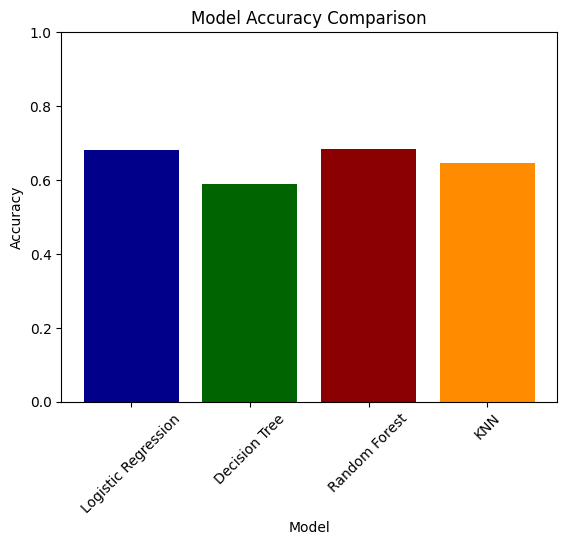

In [51]:
plt.bar(results_df['Model'], results_df['Accuracy'], color=['darkblue', 'darkgreen', 'darkred', 'darkorange'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1) 
plt.xticks(rotation=45)
plt.show()

#### **Model Tuning and Optimization**

**tunning hyperparameters to improve the model**

In [52]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)


Fitting 3 folds for each of 27 candidates, totalling 81 fits


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [53]:
best_model

RandomForestClassifier(max_depth=20, min_samples_leaf=4, random_state=42)

In [54]:
f"{test_accuracy:.2%}"

'70.20%'

In [55]:
print(classification_rep) 

              precision    recall  f1-score   support

           0       0.69      0.73      0.71      1288
           1       0.72      0.68      0.70      1306

    accuracy                           0.70      2594
   macro avg       0.70      0.70      0.70      2594
weighted avg       0.70      0.70      0.70      2594



- Precision and recall for both classes (0 and 1) are balanced:
    - Class 0: Precision = 70%, Recall = 72%, F1-score = 71%.
    - Class 1: Precision = 73%, Recall = 71%, F1-score = 72%.

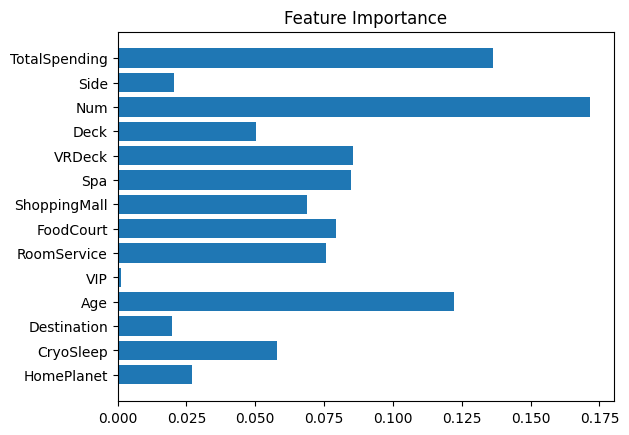

In [56]:
feature_importances = best_model.feature_importances_
features = X.columns
plt.barh(features, feature_importances)
plt.title("Feature Importance")
plt.show()


👆 
- **``TotalSpending``** is a strong predictor of whether a passenger is transported or not. 📈
- Features like **``VIP``** have negligible importance, indicating they don't meaningfully influence predictions in this dataset 📉

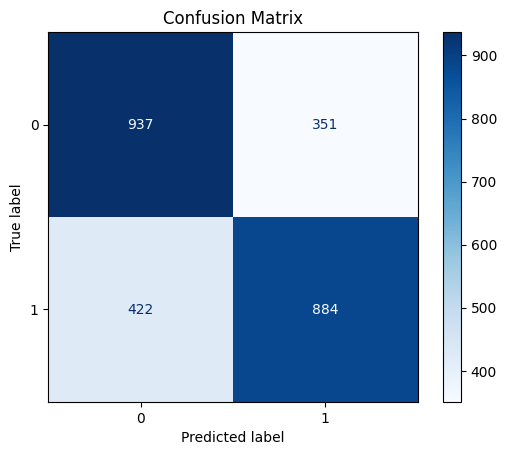

array([[937, 351],
       [422, 884]], dtype=int64)

In [57]:
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = best_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_model.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

conf_matrix

- True Positives (TP) : **937** passengers correctly predicted as Transported (True). ✅
- True Negatives (TN) : **918** passengers correctly predicted as Not Transported (False). ✅
- False Positives (FP): **354** passengers incorrectly predicted as Transported. ❌
- False Negatives (FN): **385** passengers incorrectly predicted as Not Transported. ❌

##### **Stratified Cross-Validation.**

**Stratified Cross-Validation Ensures class distribution in each fold matches the overall dataset.**

In [58]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

rf_model = RandomForestClassifier(
    n_estimators=200, 
    max_depth=10, 
    min_samples_leaf=2, 
    random_state=42
)

**Cross-Validation**

In [59]:
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionW

In [60]:
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard Deviation: {np.std(cv_scores):.4f}")

Cross-Validation Scores: [0.72744796 0.78874325 0.80609098 0.57440247 0.49691596]
Mean Accuracy: 0.6787
Standard Deviation: 0.1222


**Stratified Cross-Validation**

In [61]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scv_scores = cross_val_score(rf_model, X, y, cv=skf, scoring='accuracy')


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionW

In [62]:
print(f"Stratified CV Scores: {scv_scores}")
print(f"Mean Accuracy: {np.mean(scv_scores):.4f}")
print(f"Standard Deviation: {np.std(scv_scores):.4f}")

Stratified CV Scores: [0.69892059 0.692367   0.69737857 0.68696993 0.70624518]
Mean Accuracy: 0.6964
Standard Deviation: 0.0065


- **Cross-Validation 🆚 Stratified Cross-Validation**
    - `Cross-Validation` ➡️ Results could be misleading due to class imbalance or data partitioning issues.
    - `Stratified Cross-Validation` ➡️ Results are more reliable, highlighting the true performance of the model.

In [63]:
scors_data = {
    'Metric': ['Cross-Validation', 'Stratified CV'],
    'Mean Accuracy': [np.mean(cv_scores), np.mean(scv_scores)],
    'Ecart-type': [np.std(cv_scores), np.std(scv_scores)]
}

scors_comparison = pd.DataFrame(scors_data)

scors_comparison

,Metric,Mean Accuracy,Ecart-type
0,Cross-Validation,0.678720,0.122178
1,Stratified CV,0.696376,0.006472


Model Performance:

- Cross-Validation:
    - Mean accuracy (68.22%) was skewed due to imbalanced folds.
    - Standard Deviation High variability (11.69%), indicating inconsistent performance.


- Stratified Cross-Validation:
    - Mean accuracy (70.32%) is more consistent and aligns with the model's expected performance.
    - Standard Deviation Low variability (0.22%), indicating a stable model.

In [64]:
# conclusion : the model is good, since the accuracy is high and the standard deviation is low

In [65]:
final_predictions = best_model.predict(X)

final_results = pd.DataFrame({
    'PassengerId': df.index,  # Use the index as Passenger IDs (since i dropped it before)
    'Transported': final_predictions
})

final_results['Transported'] = final_results['Transported'].astype(bool) # make target values True/False again

final_results.head() , final_results.shape

(   PassengerId  Transported
 0            0         True
 1            1         True
 2            2        False
 3            3        False
 4            4         True,
 (12970, 2))

In [66]:
final_results.to_csv('final_miniProject_predictions.csv', index=False)


### **Project Summary Overview**

```markdown

1. **Data Preparation:**
    - **Data Loading:** Loaded training and test datasets.
    - **Data Concatenation:** Combined training and test datasets for consistent preprocessing.
    - **Handling Missing Values:** Filled missing values in both numerical and categorical features.
    - **Feature Engineering:** 
      - Separated the `Cabin` column into `Deck`, `Num`, and `Side`.
      - Dropped unnecessary columns like `Name` and `PassengerId`.
      - Created a new feature `TotalSpending` as the sum of spending-related features.
    - **Normalization:** Scaled numerical features to ensure they have a similar scale.

2. **Exploratory Data Analysis (EDA):**
    - **Visualization:** 
      - Plotted distributions of categorical and numerical features.
      - Analyzed the relationship between features and the target variable `Transported`.
    - **Correlation Analysis:** Generated a heatmap to visualize feature correlations.

3. **Modeling:**
    - **Data Splitting:** Split the data into training and testing sets.
    - **Model Training:** Trained multiple models including Logistic Regression, Decision Tree, Random Forest, and KNN.
    - **Model Evaluation:** Evaluated models using accuracy and classification reports.
    - **Model Comparison:** Compared model accuracies and visualized the results.

4. **Model Tuning and Optimization:**
    - **Hyperparameter Tuning:** Used GridSearchCV to find the best hyperparameters for the Random Forest model.
    - **Feature Importance:** Analyzed feature importances from the best model.
    - **Confusion Matrix:** Visualized the confusion matrix to understand model performance.

5. **Cross-Validation:**
    - **Stratified Cross-Validation:** Ensured class distribution in each fold matches the overall dataset.
    - **Performance Comparison:** Compared Cross-Validation and Stratified Cross-Validation results.

6. **Conclusion:**
    - The Random Forest model with tuned hyperparameters provided the best performance.
    - The model's accuracy and stability were validated using Stratified Cross-Validation.
    - Key features influencing predictions were identified, with `TotalSpending` being a strong predictor.

```